In [1]:
library(Rssa)
library(plyr)
library(proxy)
library(lattice)

Loading required package: svd
Loading required package: forecast

Attaching package: ‘Rssa’

The following object is masked from ‘package:stats’:

    decompose


Attaching package: ‘proxy’

The following object is masked from ‘package:svd’:

    as.matrix

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix



In [2]:
# impressions <- read.csv("impressions.csv", header = T, sep = ";", dec = ",", colClasses = c('character','integer','numeric','numeric','numeric')  )
# impressions <- read.csv("/Users/klimmy/Klim/Statmod/SSA/TC_countries.csv", header = T, sep = ",", dec = ".")


Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ошибка конвертации 'Время' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ошибка конвертации 'Время' в 'mbcsToSbcs': точка заменена на <92>”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ошибка конвертации 'Время' в 'mbcsToSbcs': точка заменена на <d1>”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ошибка конвертации 'Время' в 'mbcsToSbcs': точка заменена на <80>”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ошибка конвертации 'Время' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ошибка конвертации 'Время' в 'mbcsToSbcs': точка заменена на <b5>”Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“ошибка конвертации 'Время' в 'mbcsToSbcs': точка заменена на <d0>”Warning message in title(main = main, xla

[1] 672


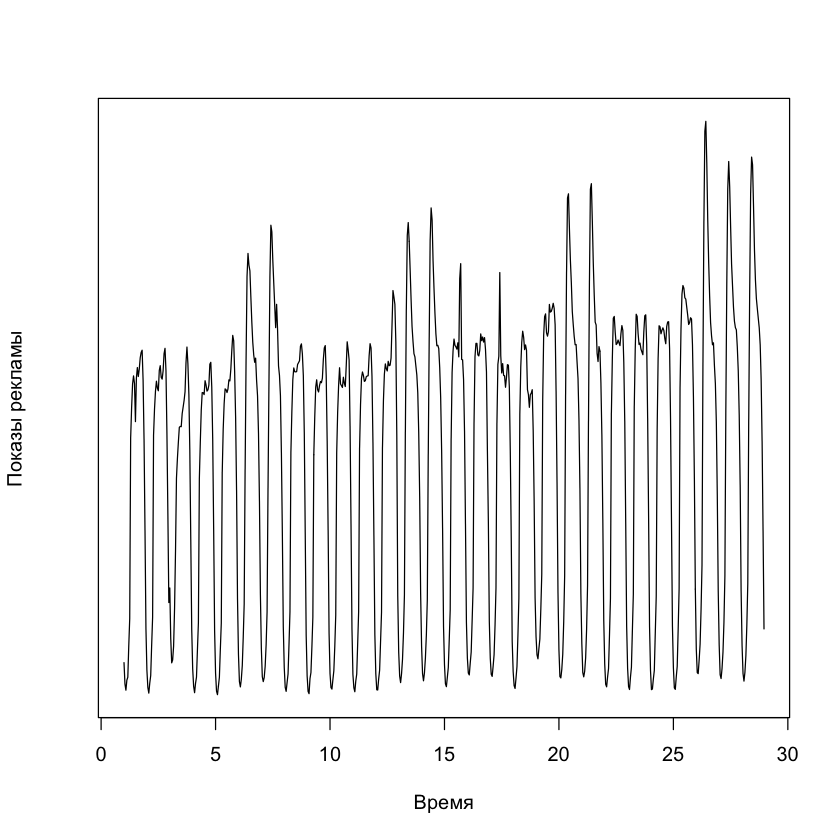

In [17]:
impressions <- read.csv("/Users/klimmy/Klim/Statmod/2 семестр/SSA семинары/impressions.csv", header = T, sep = ",", dec = ".")
impressions_ts <- ts(impressions[,2], frequency = 24)
plot(impressions_ts,yaxt='n',xlab="Время",ylab="Показы рекламы")
# title(main="Исходный ряд")
# axis(1,,labels=, pos=, lty=, col=, las=, tck=, ...)
print(length(impressions_ts))

In [28]:
png("fig/examples_long_ts.png", width = 350, height = 350)
plot(impressions_ts,yaxt='n',xlab="Время",ylab="Показы рекламы")
dev.off()

pdf 
  2

In [29]:
average_smoothing <- function(time_series, window) {
    s = 1
    e = length(time_series) - window + 1
    new_time_series <- rep(mean(time_series[s:window]), round(window/2)-1)
    e_2 <- length(new_time_series)
    
    for (i in seq(e)) {
        new_time_series[i+round(window/2)-1] <- mean(time_series[i:(i+window-1)])
    }
    new_time_series[(e+e_2+1):length(time_series)] <- rep(mean(time_series[e:(e+window-1)]), (length(time_series) - length(new_time_series)))
    return(
        ts(new_time_series, start = c(1,1), frequency = frequency(time_series))
    )
}

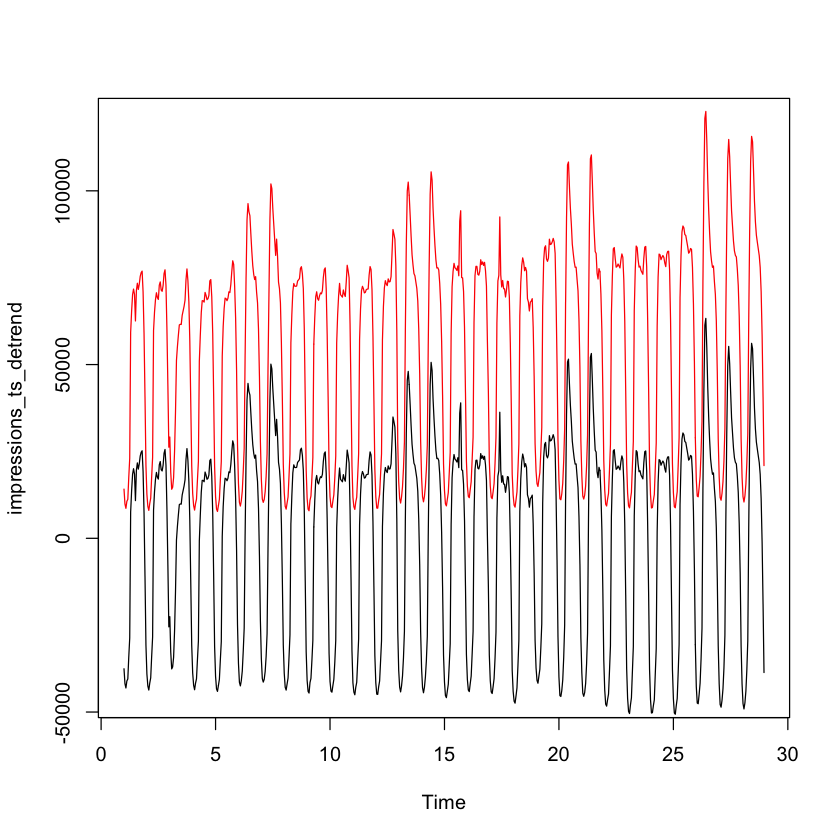

In [30]:
impressions_ts_detrend <- impressions_ts - average_smoothing(impressions_ts,168)
plot(impressions_ts_detrend, ylim = c(-45000,120000))
lines(impressions_ts, type = 'l', col = 'red')

In [31]:
impressions_ts_detrend_work <- ts(impressions_ts_detrend[c(1:120,169:288,337:456,505:600)], frequency = 24)
impressions_ts_detrend_weekend <- ts(impressions_ts_detrend[c(121:168,289:336,457:504,601:672)], frequency = 24)

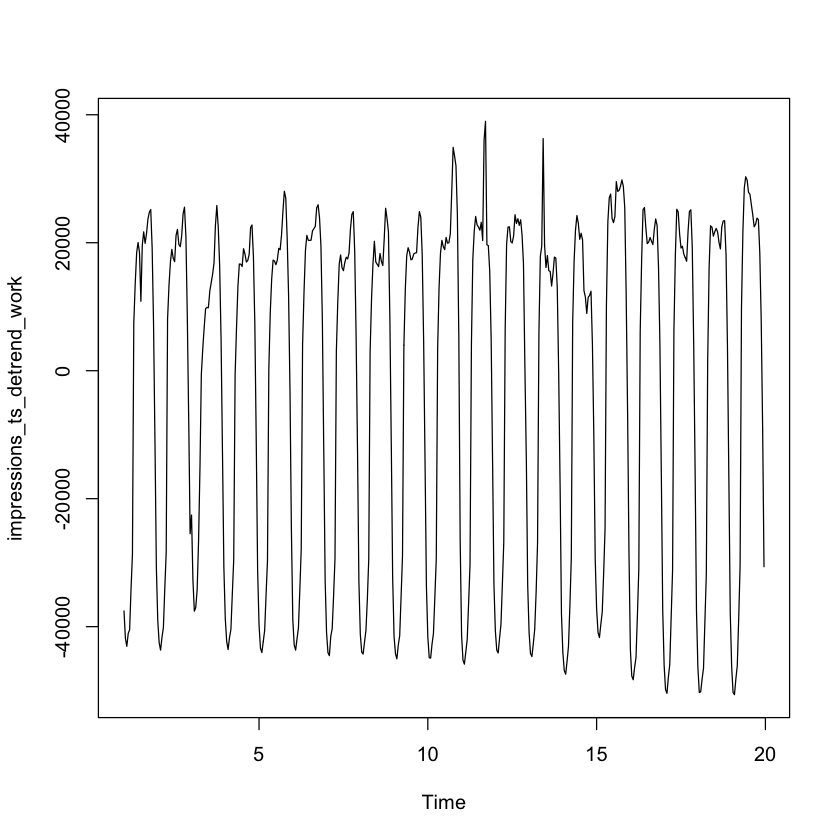

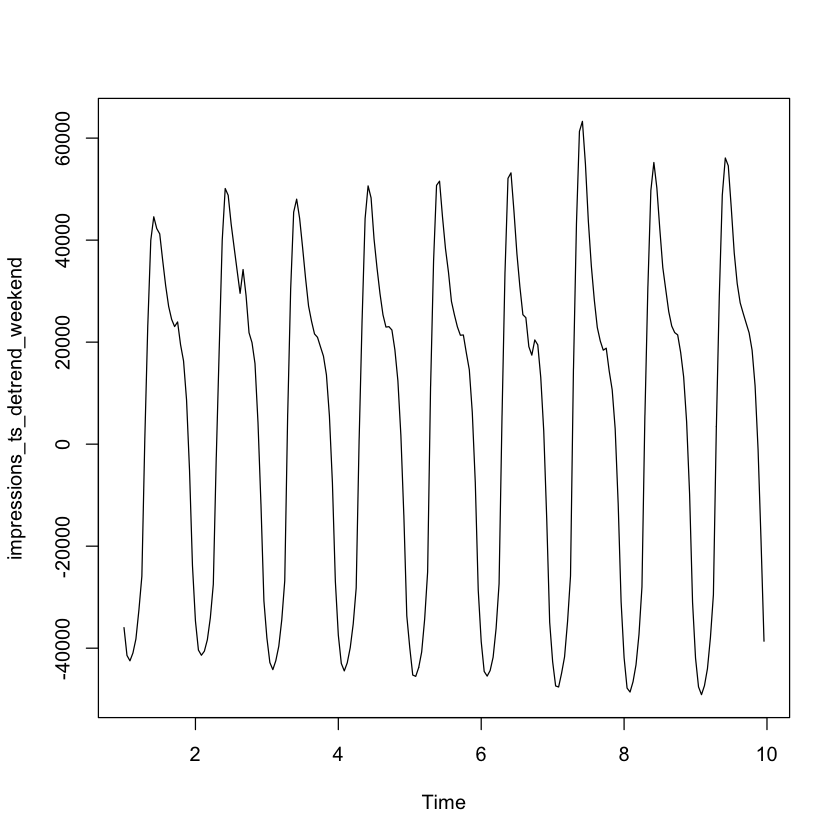

In [32]:
plot(impressions_ts_detrend_work)
plot(impressions_ts_detrend_weekend)


In [34]:
png("fig/examples_long_weekends.png", width = 350, height = 350)
plot(impressions_ts_detrend_weekend,yaxt='n',xlab="Время",ylab="Показы рекламы")
dev.off()

pdf 
  2

In [44]:
length(impressions_ts_detrend_weekend)

[1] 216

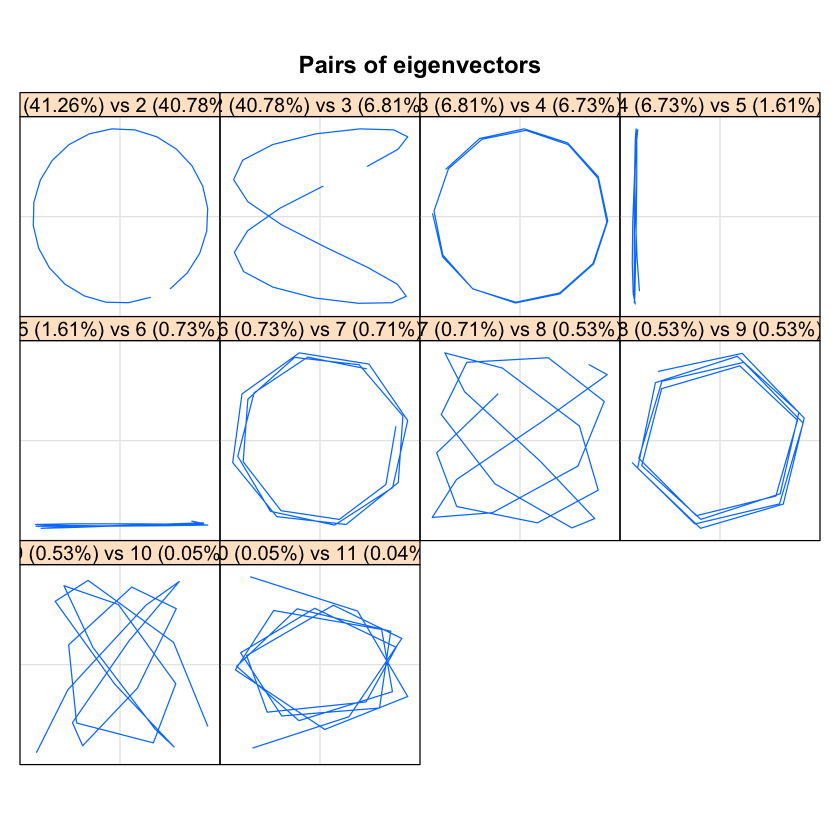

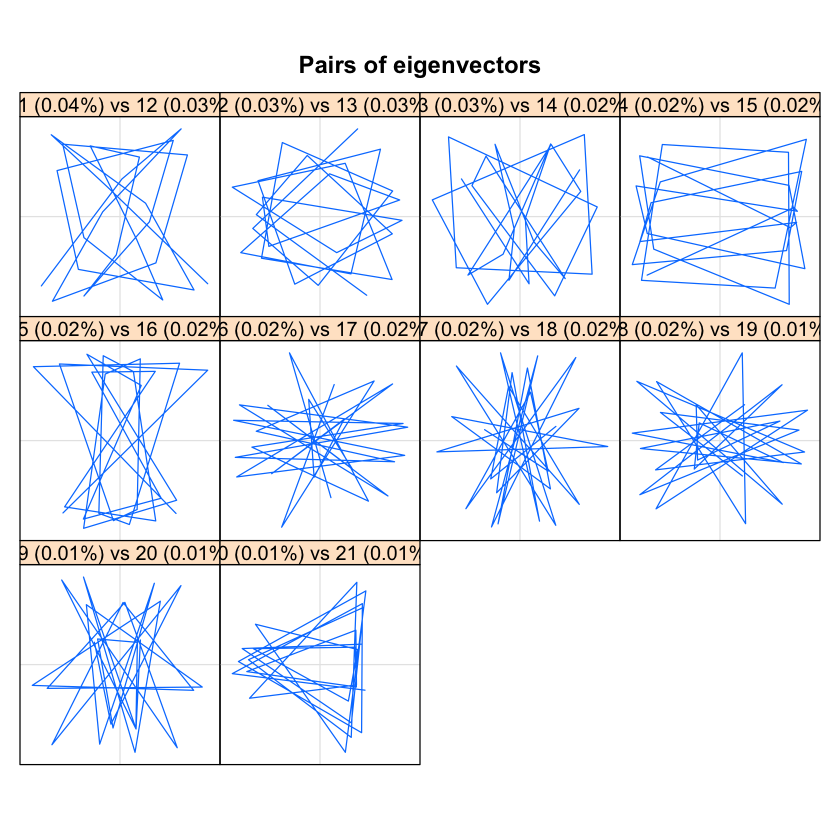

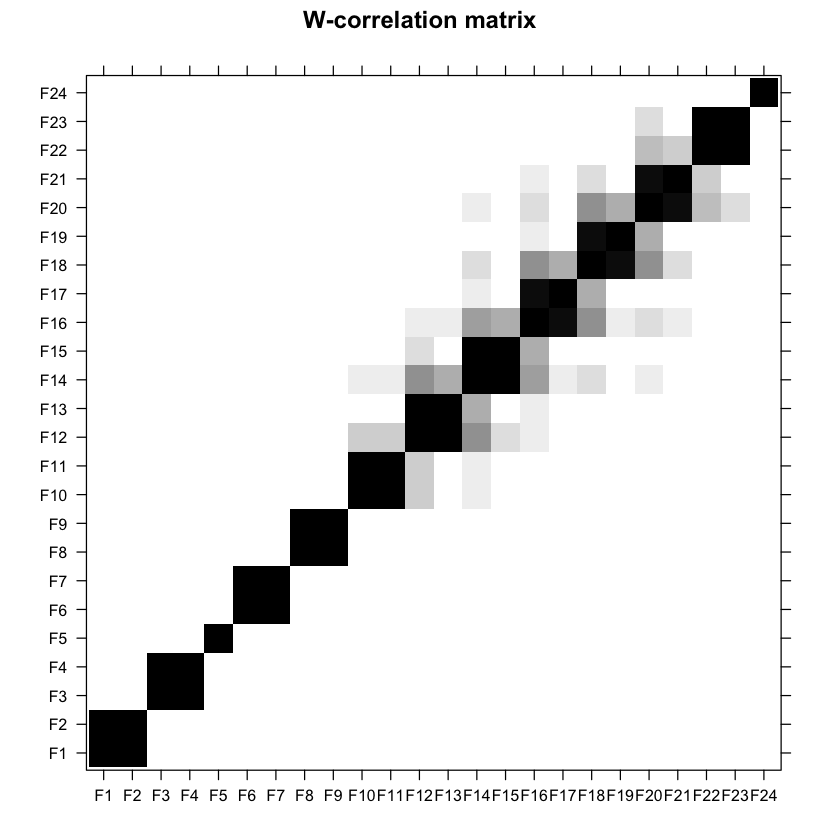

In [7]:
s <- ssa(impressions_ts_detrend_weekend, L = 24)
plot(s, type = "paired", idx=1:10)
plot(s, type = "paired", idx=11:20)
# plot(s, type = "paired", idx=21:30)
# plot(s, type = "paired", idx=31:40)
# plot(s, type = "paired", idx=41:49)
plot(wcor(s))

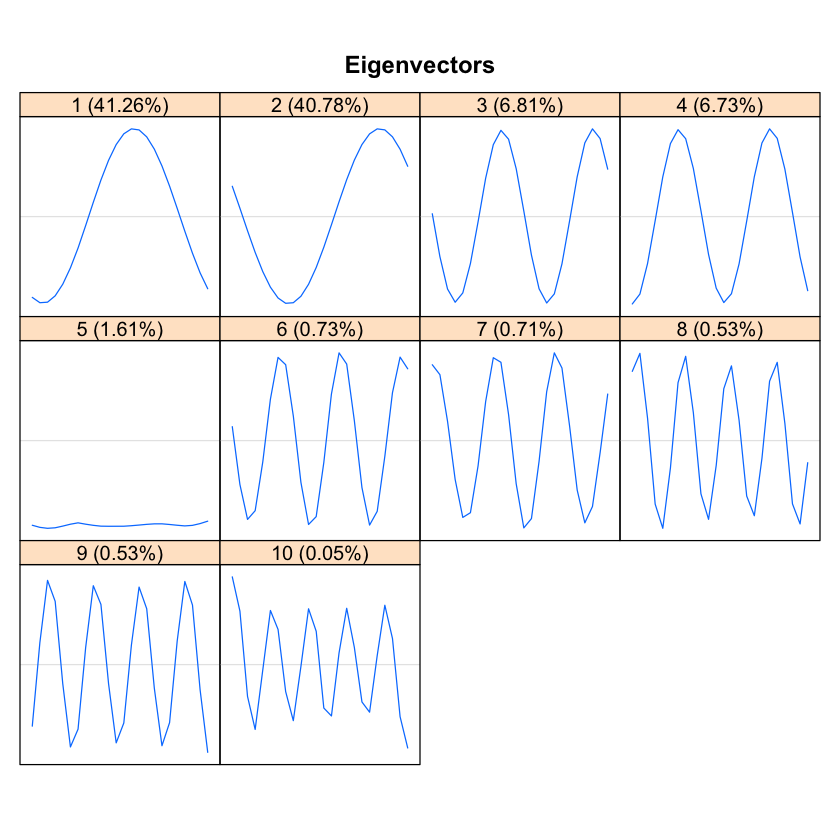

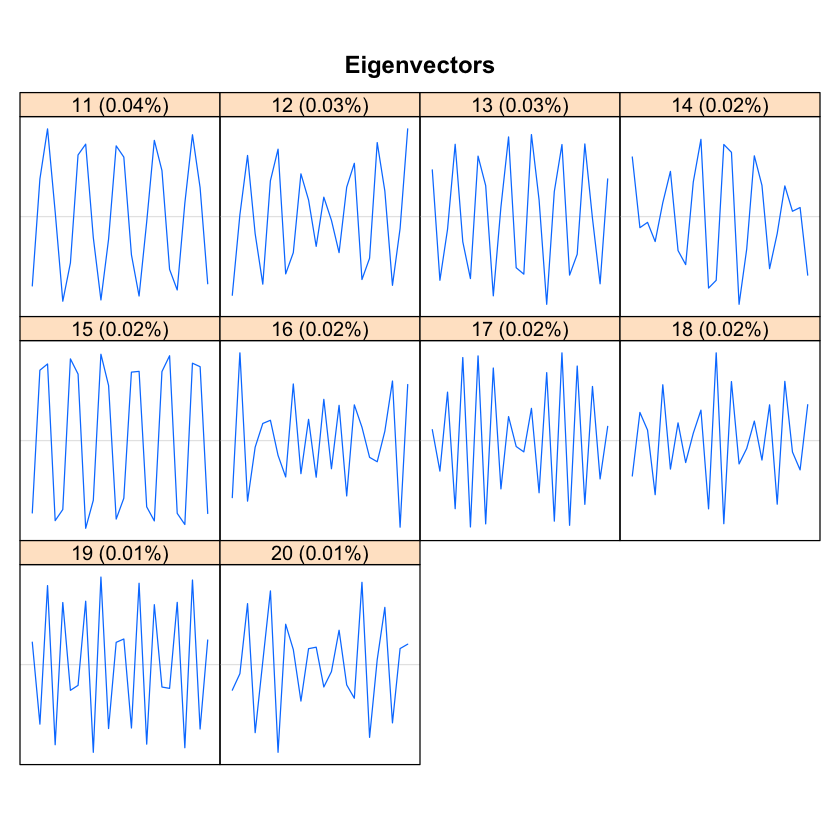

In [14]:
s <- ssa(impressions_ts_detrend_weekend, L = 24)
plot(s, type = "vector", idx=1:10)
plot(s, type = "vector", idx=11:20)
# plot(s, type = "vector", idx=21:30)
# plot(s, type = "vector", idx=31:40)
# plot(s, type = "vector", idx=41:49)

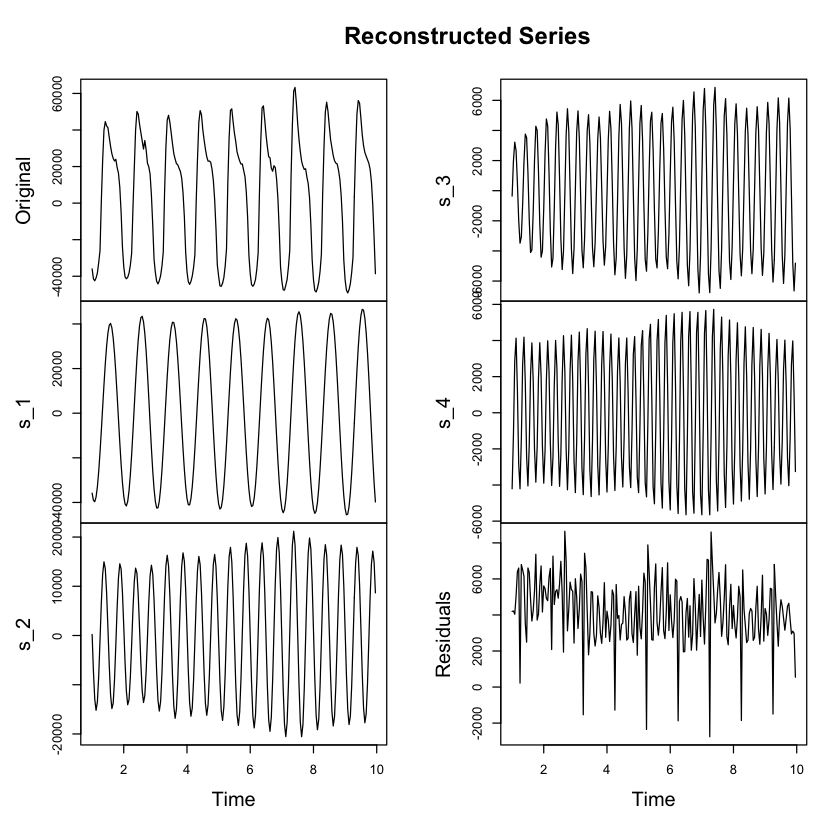

In [8]:
r_5 <- reconstruct(s, groups = list(s_1 = c(1,2), s_2 = c(3,4), s_3 = c(6,7), s_4 = c(8,9)))
plot(r_5)

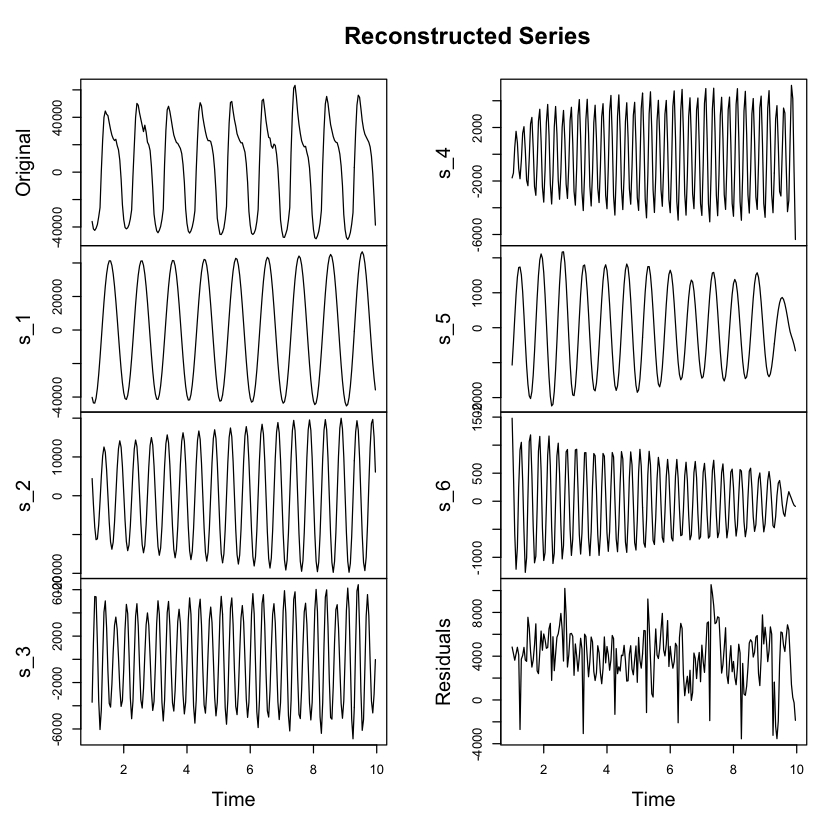

In [50]:
# r_5 <- reconstruct(s, groups = list(s_1 = c(1,2), s_2 = c(3,4), s_3 = c(6,7), s_4 = c(8,9), s_5 = c(10,11), s_6 = c(20,21) ))
# plot(r_5)

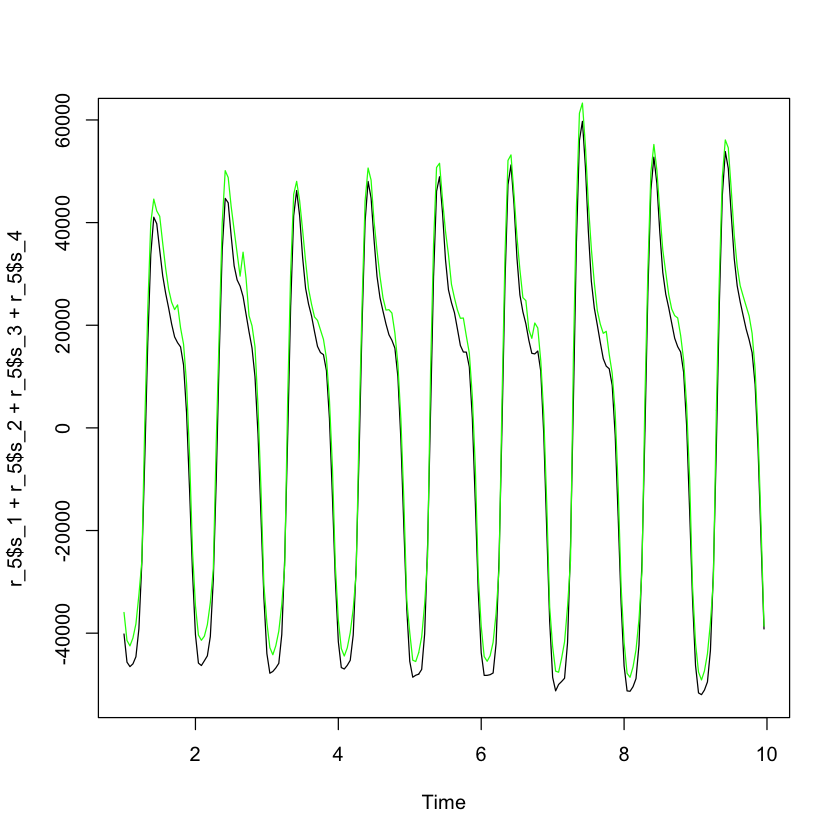

In [16]:
plot(r_5$s_1 + r_5$s_2 + r_5$s_3 + r_5$s_4)
lines(impressions_ts_detrend_weekend, col = 'green')

In [35]:
#Estimation by means of the first iteration of Cadzow
#iterations (SSA)
par <- parestimate(s, groups = list(s_1 = c(1,2), s_2 = c(3,4), s_3 = c(6,7), s_4 = c(8,9)), 
                   method = "esprit")
print(par)
# o <- order(abs(par$periods), decreasing = TRUE)
# periods <- (par$periods[o])
# moduli <- par$moduli[o]
# len <- rank
# vars <- matrix(nrow = len, ncol = rank)
# for (i in 1:rank) {
#   if (periods[i] == Inf)
#     vars[, i] <- moduli[i]^(1:len)
#   else if (periods[i] == 2)
#     vars[, i] <- (-moduli[i])^(1:len)
#   else if (periods[i] > 0)
#     vars[, i] <- 
#       moduli[i]^(1:len) * sin(2 * pi * (1:len) / periods[i])
#   else
#     vars[, i] <- 
#       moduli[i]^(1:len) * cos(2 * pi * (1:len) / periods[i])
# }
# lm0 <- lm(r0[1:len] ~ 0 + ., data = data.frame(vars))
# coefs0 <- coef(lm0)
# print(round(coefs0[1:6], digits = 2))
# print(round(coefs0[7:11], digits = 2))

$s_1
   period     rate   |    Mod     Arg  |     Re        Im
   23.952   0.000863 |  1.00086   0.26 |  0.96662   0.25955
  -23.952   0.000863 |  1.00086  -0.26 |  0.96662  -0.25955

$s_2
   period     rate   |    Mod     Arg  |     Re        Im
   12.017   0.000333 |  1.00033   0.52 |  0.86668   0.49953
  -12.017   0.000333 |  1.00033  -0.52 |  0.86668  -0.49953

$s_3
   period     rate   |    Mod     Arg  |     Re        Im
    8.004   0.003296 |  1.00330   0.78 |  0.70975   0.70913
   -8.004   0.003296 |  1.00330  -0.78 |  0.70975  -0.70913

$s_4
   period     rate   |    Mod     Arg  |     Re        Im
    6.022  -0.002162 |  0.99784   1.04 |  0.50224   0.86223
   -6.022  -0.002162 |  0.99784  -1.04 |  0.50224  -0.86223



In [25]:
parc <- parestimate(s, groups = list(1:10), 
                    method = "esprit")
parc$periods

[1]   8.020287  -8.020287  23.942048 -23.942048  12.011912 -12.011912
 [7]   6.021160  -6.021160        Inf        Inf

In [8]:
#Estimation by means of the limit of Cadzow iterations
rank <- 10
rc <- reconstruct(s, groups = list(signal = 1:rank))$signal

parc <- parestimate(s, groups = list(1:rank), 
                    method = "esprit")
print(parc)
oc <- order(abs(parc$periods), decreasing = TRUE)
periodsc <- (parc$periods[oc])
modulic <- parc$moduli[oc]
lenc <- rank
varsc <- matrix(nrow = lenc, ncol = rank)
for (i in 1:rank) {
  if (periodsc[i] == Inf)
    varsc[, i] <- modulic[i]^(1:lenc)
  else if (periodsc[i] == 2)
    varsc[, i] <- (-modulic[i])^(1:lenc)
  else if (periodsc[i] > 0)
    varsc[, i] <- 
      modulic[i]^(1:lenc) * sin(2 * pi * (1:lenc) / periodsc[i])
  else
    varsc[, i] <- 
      modulic[i]^(1:lenc) * cos(2 * pi * (1:lenc) / periodsc[i])
}
lm.c <- lm(rc[1:lenc] ~ 0 + ., data = data.frame(varsc))
#lm.c
coefs.c <- coef(lm.c)
print(round(coefs.c[1:6], digits = 2))
print(round(coefs.c[7:11], digits = 2))

   period     rate   |    Mod     Arg  |     Re        Im
    8.020   0.002267 |  1.00227   0.78 |  0.71012   0.70730
   -8.020   0.002267 |  1.00227  -0.78 |  0.71012  -0.70730
   23.942   0.001016 |  1.00102   0.26 |  0.96674   0.25969
  -23.942   0.001016 |  1.00102  -0.26 |  0.96674  -0.25969
   12.012   0.000266 |  1.00027   0.52 |  0.86652   0.49968
  -12.012   0.000266 |  1.00027  -0.52 |  0.86652  -0.49968
    6.021   0.000136 |  1.00014   1.04 |  0.50325   0.86430
   -6.021   0.000136 |  1.00014  -1.04 |  0.50325  -0.86430
      Inf  -0.003855 |  0.99615   0.00 |  0.99615   0.00000
      Inf  -0.664929 |  0.51431  -0.00 |  0.51431  -0.00000
        X1         X2         X3         X4         X5         X6 
  765960.7  -465713.3   208398.8 -1141600.7  -198186.2  -502343.9 
       X7        X8        X9       X10      <NA> 
141371.05 -58284.87   3080.16  14869.25        NA 


In [49]:
idx <- seq(2, 11, 2)
coefs.c.phase <- numeric(length(idx))
phases.c <- numeric(length(idx))
periods.c.phase <- numeric(length(idx))
moduli.c.phase <- numeric(length(idx))
for (i in seq_along(idx)) {
  periods.c.phase[i] <- periodsc[idx[i]]
  moduli.c.phase[i] <- modulic[idx[i]]
  coefs.c.phase[i] <- sqrt(coefs.c[idx[i]]^2 + 
                             coefs.c[idx[i] + 1]^2)
  phases.c[i] <- atan2(coefs.c[idx[i] + 1], coefs.c[idx[i]])
}
print("trend:")
print("coefficient * modulus^n")
print(data.frame(coefficients = coefs.c[1], 
                 moduli = modulic[1]))  
print("periodics:")
print("coefficient * modulus^n * cos(2 * pi* n/period + phase)")
print(data.frame(periods = periods.c.phase, phases = phases.c, 
                 coefficients = coefs.c.phase, 
                 moduli = moduli.c.phase))  

[1] "trend:"
[1] "coefficient * modulus^n"
   coefficients    moduli
X1     765960.7 0.9961525
[1] "periodics:"
[1] "coefficient * modulus^n * cos(2 * pi* n/period + phase)"
     periods    phases coefficients   moduli
1        Inf  2.720834     510214.6 0.514310
2  23.942048 -2.969702    1158676.0 1.001017
3 -12.011912  2.867265     521857.4 1.000266
4  -8.020287  3.088795      58366.2 1.002269
5  -6.021160        NA           NA 1.000136


In [11]:
(3*pi)/4

[1] 2.356194

In [43]:
(2.969702/pi)*18

[1] 0.9452855

In [42]:
17/18

[1] 0.9444444

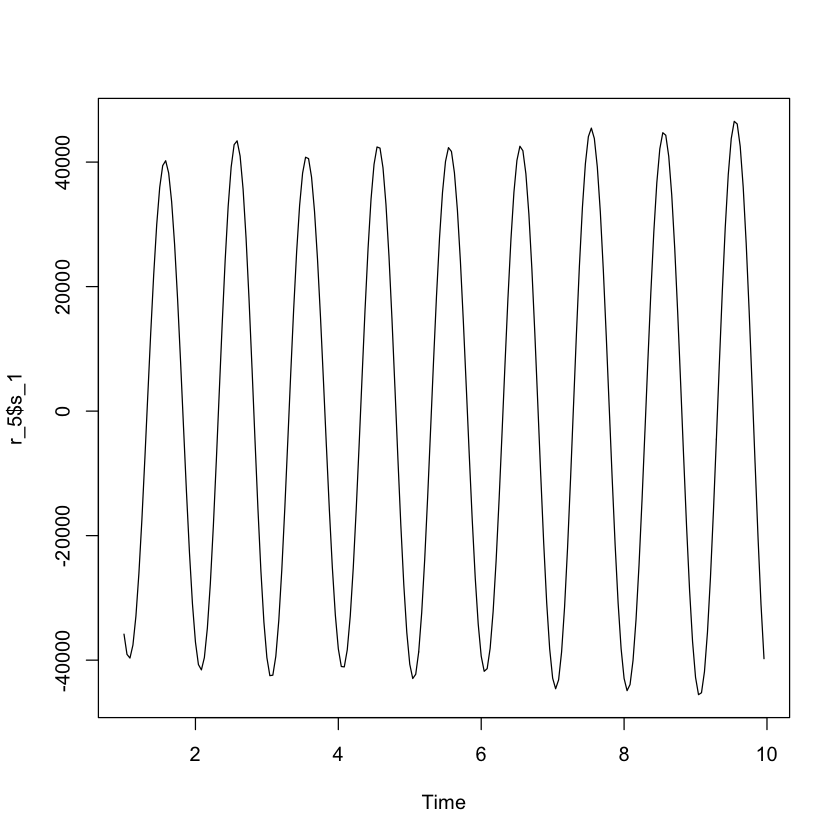

In [48]:
plot(r_5$s_1)

[1] 216

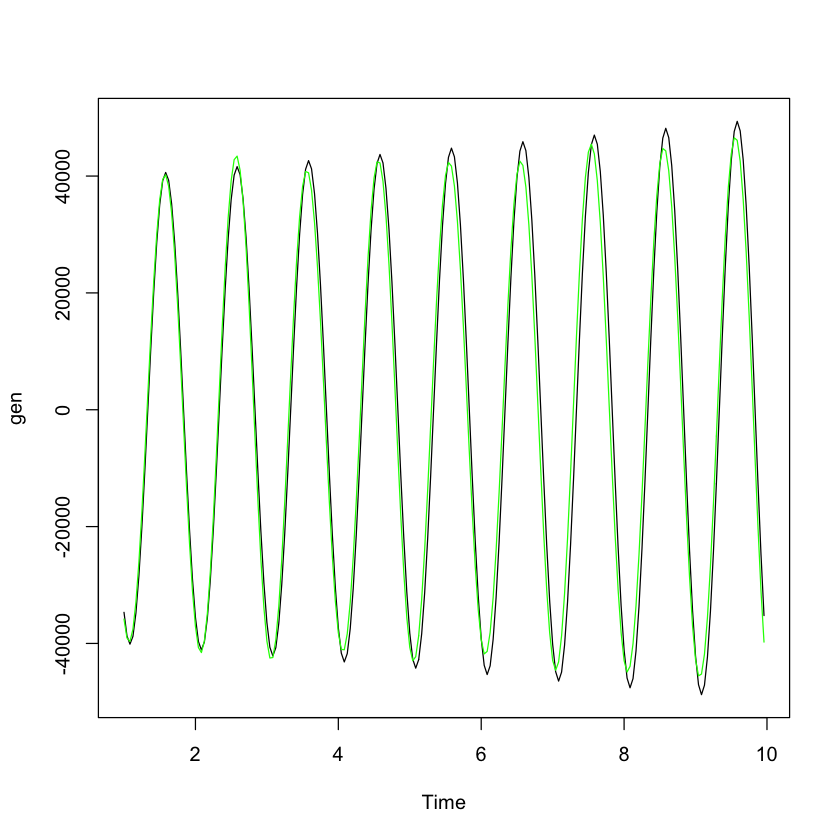

In [56]:
x <- seq(1, 216, by = 1)
length(x)
gen <- ts(40000*(1.001017^x)*cos((2*pi*x)/24 + (3*pi)/4),frequency = 24)
plot(gen, type='l')
lines(r_5$s_1, col = 'green')

[1] 216

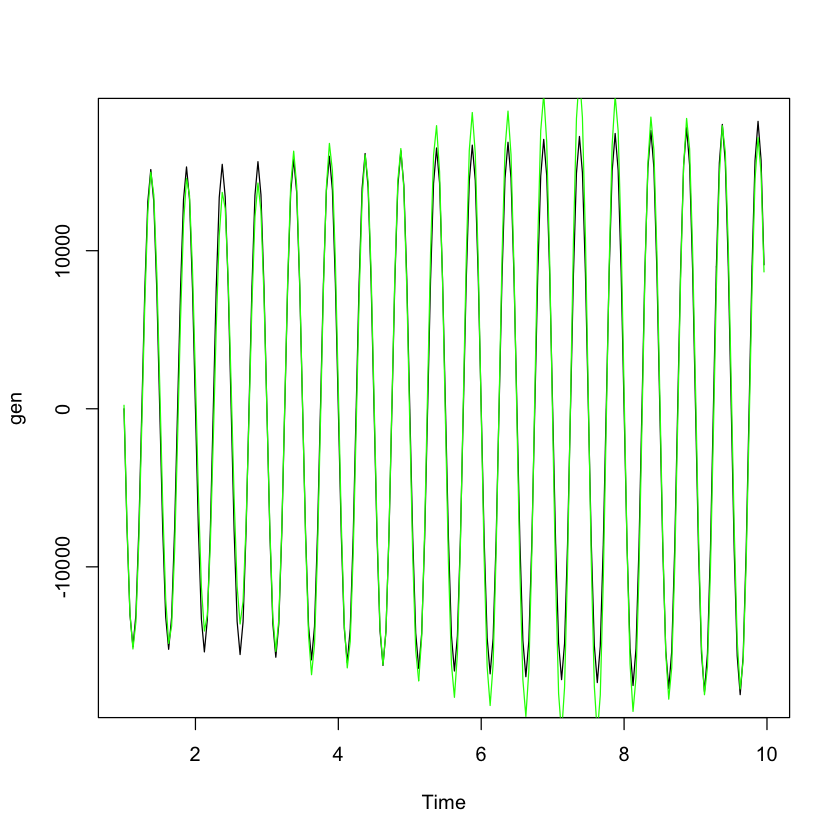

In [86]:
x <- seq(1, 216, by = 1)
length(x)
gen <- ts(15000*(1.0009^x)*cos((2*pi*x)/12 + pi/3),frequency = 24)
plot(gen, type='l')
lines(r_5$s_2, col = 'green')

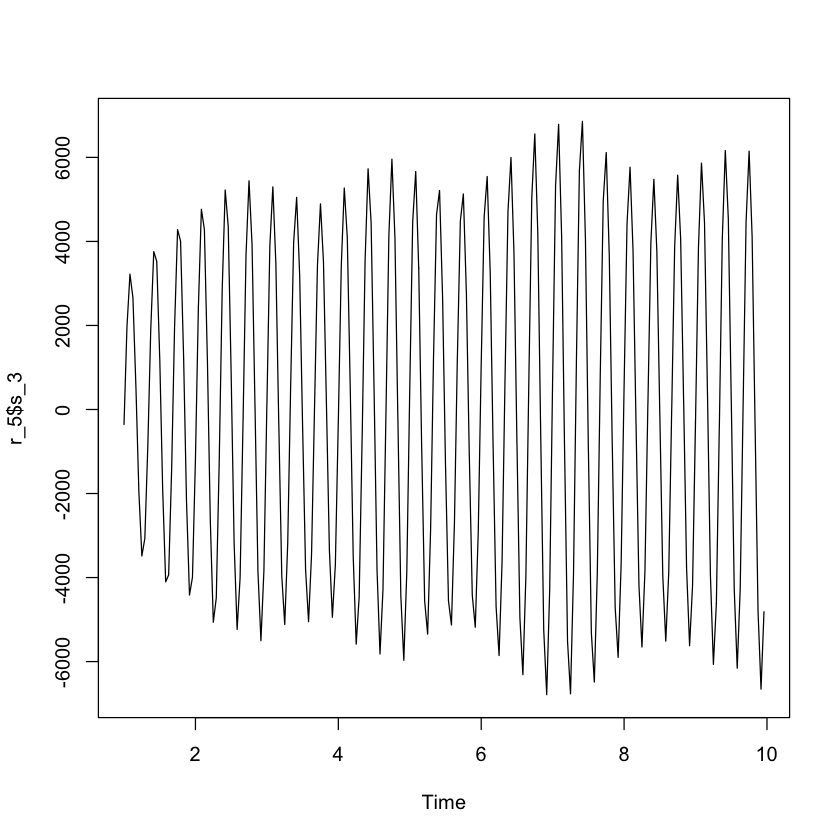

In [158]:
plot(r_5$s_3)

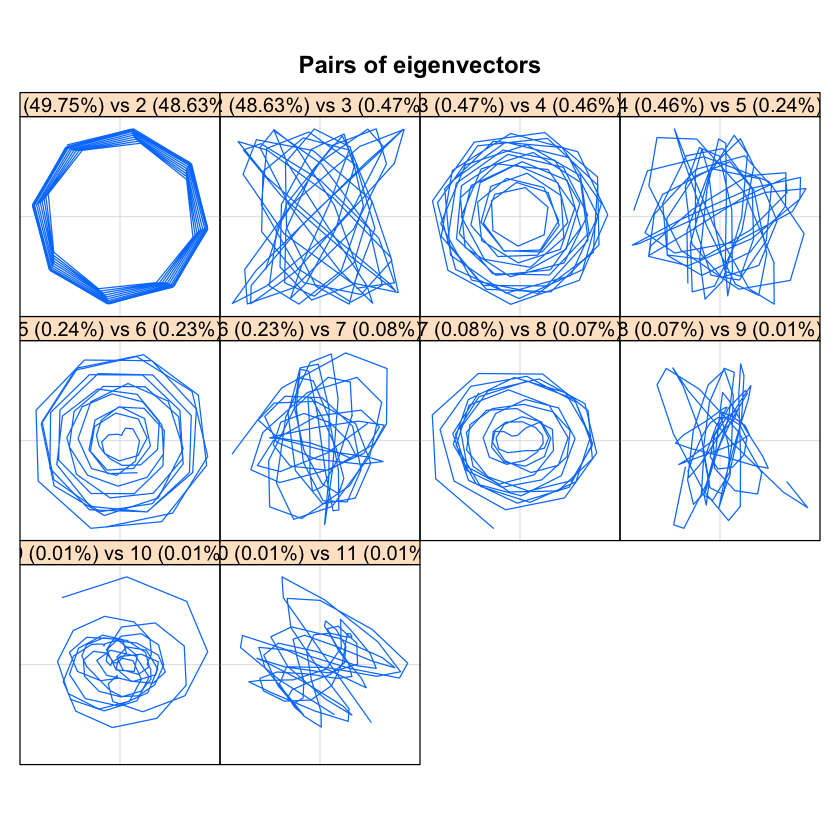

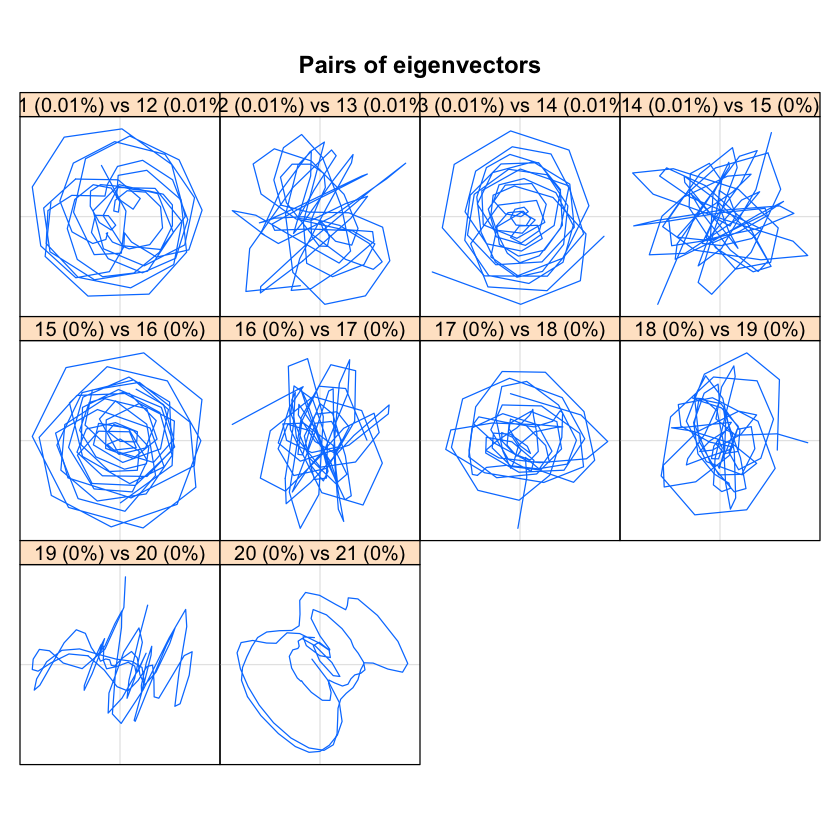

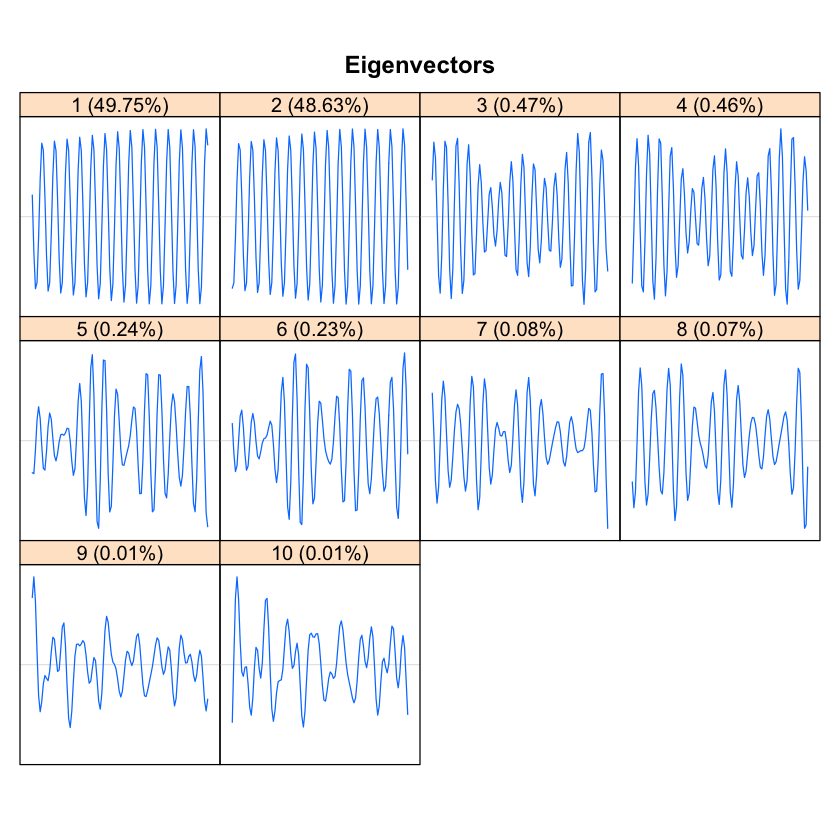

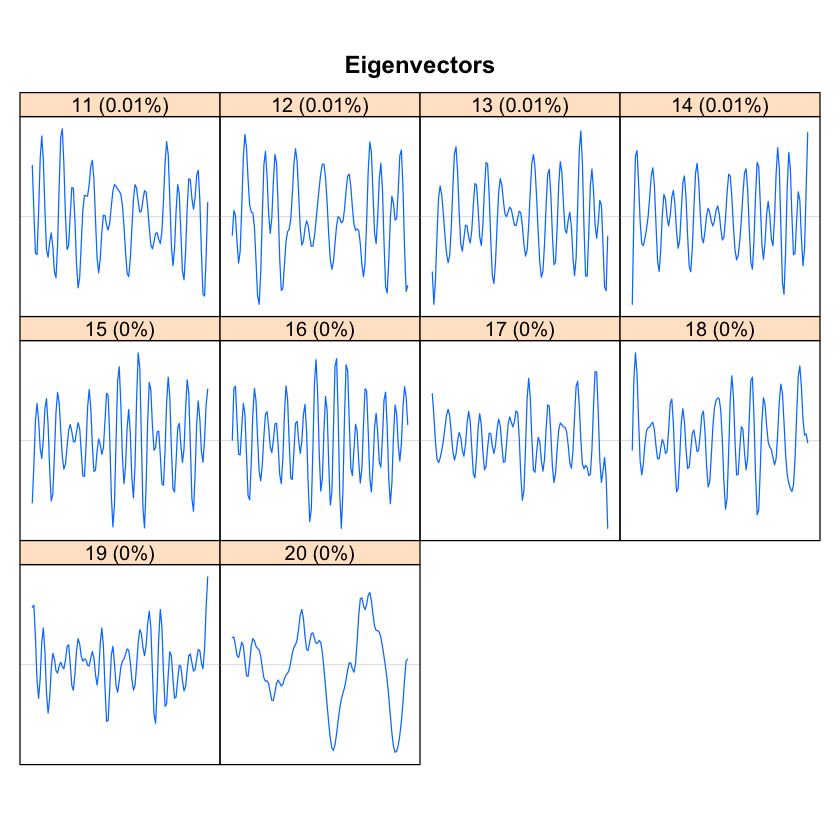

In [69]:
s_2 <- ssa(r_5$s_3, L = 112)
plot(s_2, type = "paired", idx=1:10)
plot(s_2, type = "paired", idx=11:20)
plot(s_2, type = "vector", idx=1:10)
plot(s_2, type = "vector", idx=11:20)

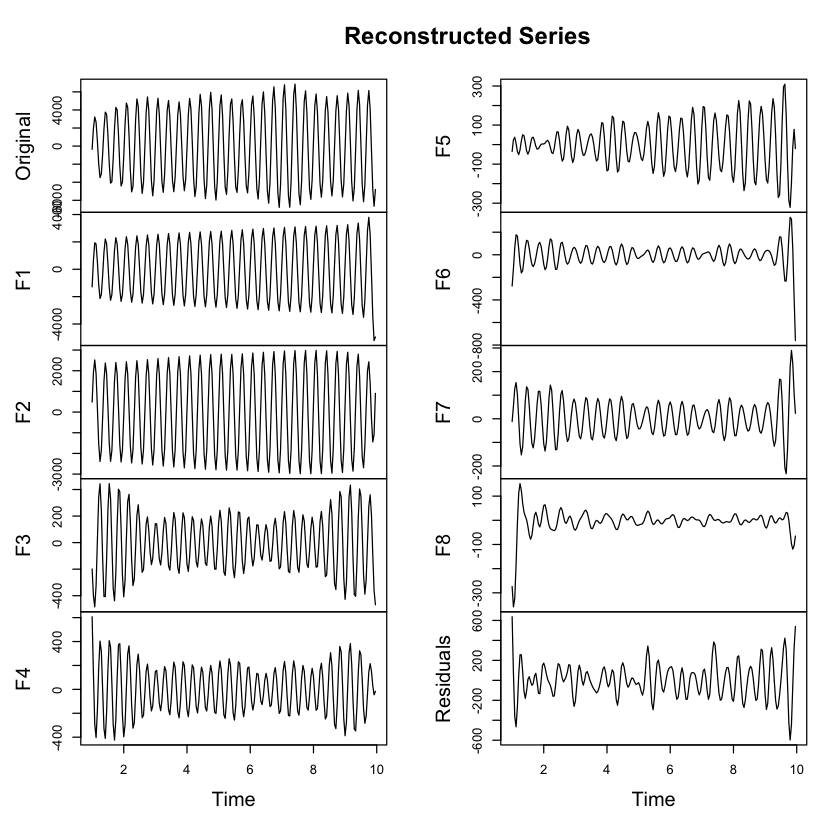

In [65]:
r_2 <- reconstruct(s_2, groups = list(1,2,3,4,6,7,8,9))
plot(r_2)

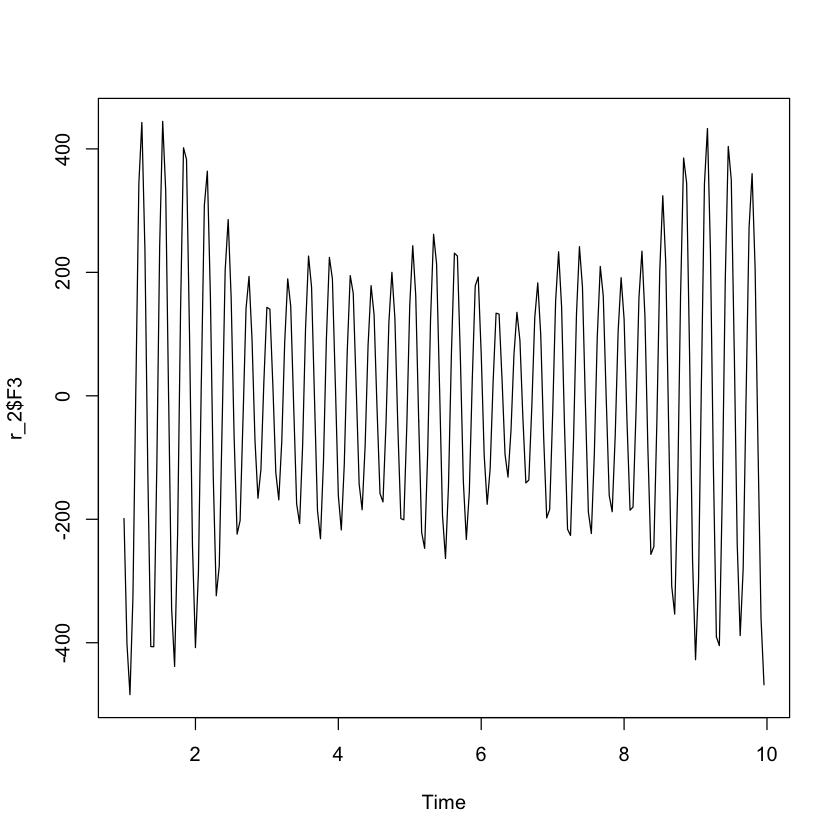

In [68]:
plot(r_2$F3)

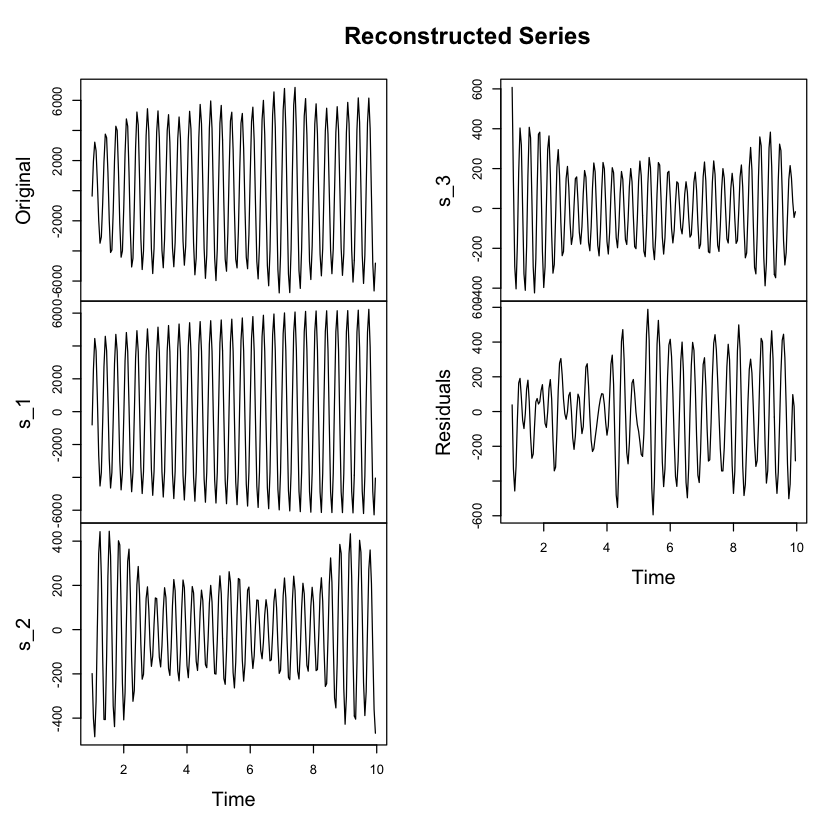

In [60]:
r_2 <- reconstruct(s_2, groups = list(s_1= c(1,2), s_2 = c(3), s_3 = c(4)))
plot(r_2)

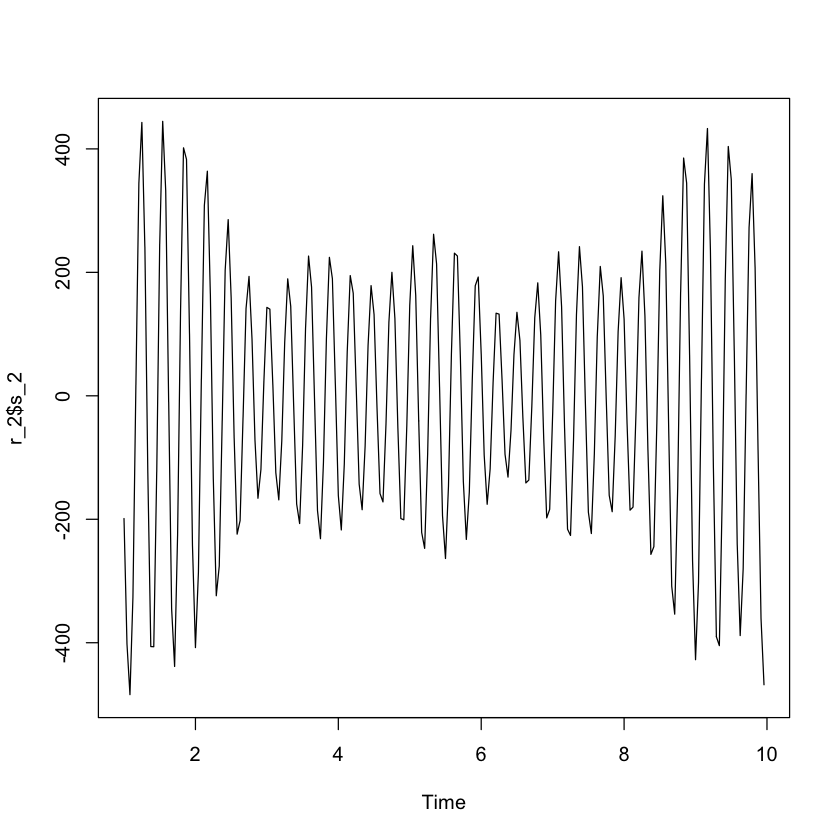

In [64]:
plot(r_2$s_1)
lines(r_5$s_3, col = 'green')

In [19]:
#Estimation by means of the limit of Cadzow iterations
rank <- 2
rc <- reconstruct(s_2, groups = list(signal= c(1,2)))$signal

parc <- parestimate(s_2, groups = list(1:rank), 
                    method = "esprit")
print(parc)
oc <- order(abs(parc$periods), decreasing = TRUE)
periodsc <- (parc$periods[oc])
modulic <- parc$moduli[oc]
lenc <- rank
varsc <- matrix(nrow = lenc, ncol = rank)
for (i in 1:rank) {
  if (periodsc[i] == Inf)
    varsc[, i] <- modulic[i]^(1:lenc)
  else if (periodsc[i] == 2)
    varsc[, i] <- (-modulic[i])^(1:lenc)
  else if (periodsc[i] > 0)
    varsc[, i] <- 
      modulic[i]^(1:lenc) * sin(2 * pi * (1:lenc) / periodsc[i])
  else
    varsc[, i] <- 
      modulic[i]^(1:lenc) * cos(2 * pi * (1:lenc) / periodsc[i])
}
lm.c <- lm(rc[1:lenc] ~ 0 + ., data = data.frame(varsc))
#lm.c
coefs.c <- coef(lm.c)
print(round(coefs.c[1:6], digits = 2))
print(round(coefs.c[7:11], digits = 2))




idx <- seq(1, rank, 1)
# idx <- c(3,4,5,6,7,8,9,10)
coefs.c.phase <- numeric(length(idx))
phases.c <- numeric(length(idx))
periods.c.phase <- numeric(length(idx))
moduli.c.phase <- numeric(length(idx))
for (i in seq_along(idx)) {
  periods.c.phase[i] <- periodsc[idx[i]]
  moduli.c.phase[i] <- modulic[idx[i]]
  coefs.c.phase[i] <- sqrt(coefs.c[idx[i]]^2 + 
                             coefs.c[idx[i] + 1]^2)
  phases.c[i] <- atan2(coefs.c[idx[i] + 1], coefs.c[idx[i]])
}
print("trend:")
print("coefficient * modulus^n")
print(data.frame(coefficients = coefs.c[1], 
                 moduli = modulic[1]))  
print("periodics:")
print("coefficient * modulus^n * cos(2 * pi* n/period + phase)")
print(data.frame(periods = periods.c.phase, phases = phases.c, 
                 coefficients = coefs.c.phase, 
                 moduli = moduli.c.phase))  

   period     rate   |    Mod     Arg  |     Re        Im
    7.987   0.002295 |  1.00230   0.79 |  0.70780   0.70967
   -7.987   0.002295 |  1.00230  -0.79 |  0.70780  -0.70967
      X1       X2     <NA>     <NA>     <NA>     <NA> 
-2707.58  1929.83       NA       NA       NA       NA 
<NA> <NA> <NA> <NA> <NA> 
  NA   NA   NA   NA   NA 
[1] "trend:"
[1] "coefficient * modulus^n"
   coefficients   moduli
X1    -2707.584 1.002297
[1] "periodics:"
[1] "coefficient * modulus^n * cos(2 * pi* n/period + phase)"
    periods  phases coefficients   moduli
1 -7.986586 2.52236     3324.946 1.002297
2  7.986586      NA           NA 1.002297


[1] 216

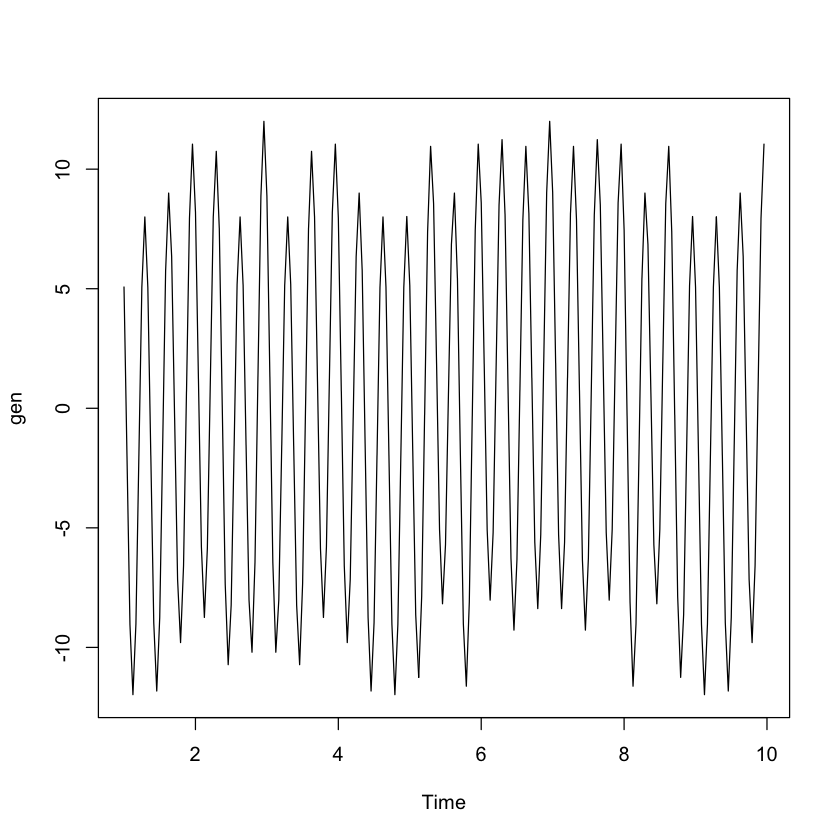

In [57]:
x <- seq(1, 216, by = 1)
length(x)
# gen <- ts(3324*cos((2*pi*x)/8 + 2.52236 + cos((2*pi*x)/8)),frequency = 24)
gen <- ts(10*cos((2*pi*x)/8) + 2*cos((2*pi*x)/48 + 3*cos((2*pi*x)/64)),frequency = 24)
plot(gen, type='l')
# lines(r_2$s_1, col = 'green')

In [ ]:
r_2$s_2

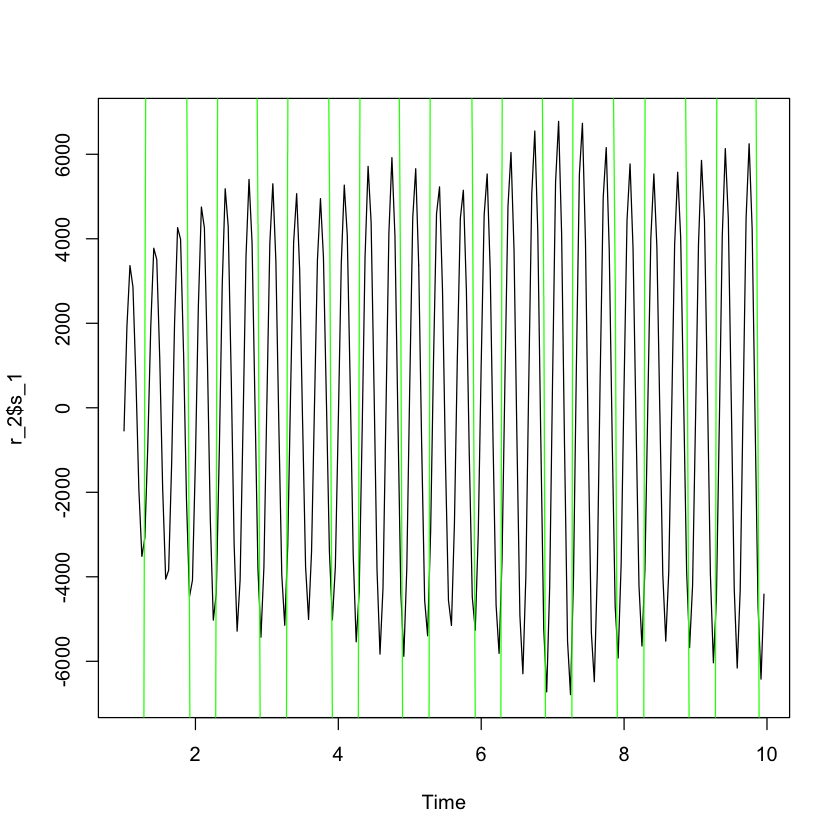

In [17]:
plot(r_2$s_1)
lines(impressions_ts_detrend_weekend, col = 'green')

In [ ]:
s_3 <- ssa(r_2$s_2, L = 64)
plot(s_2, type = "paired", idx=1:10)
# plot(s_2, type = "paired", idx=11:20)
plot(s_2, type = "vector", idx=1:10)
# plot(s_2, type = "vector", idx=11:20)

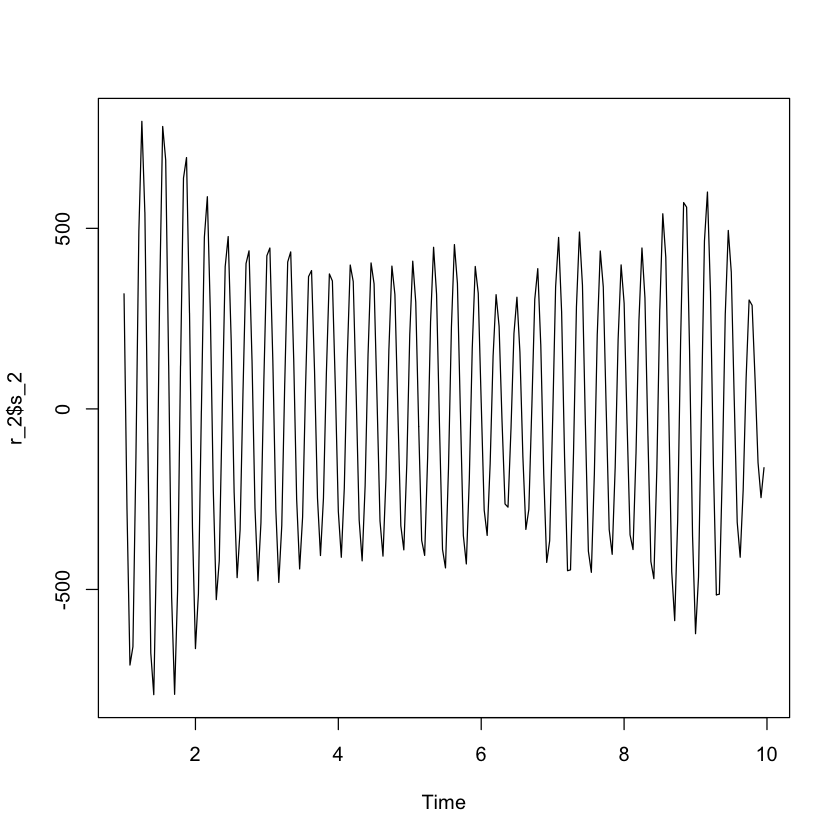

In [177]:
plot(r_2$s_2)

In [163]:
8*8

[1] 64

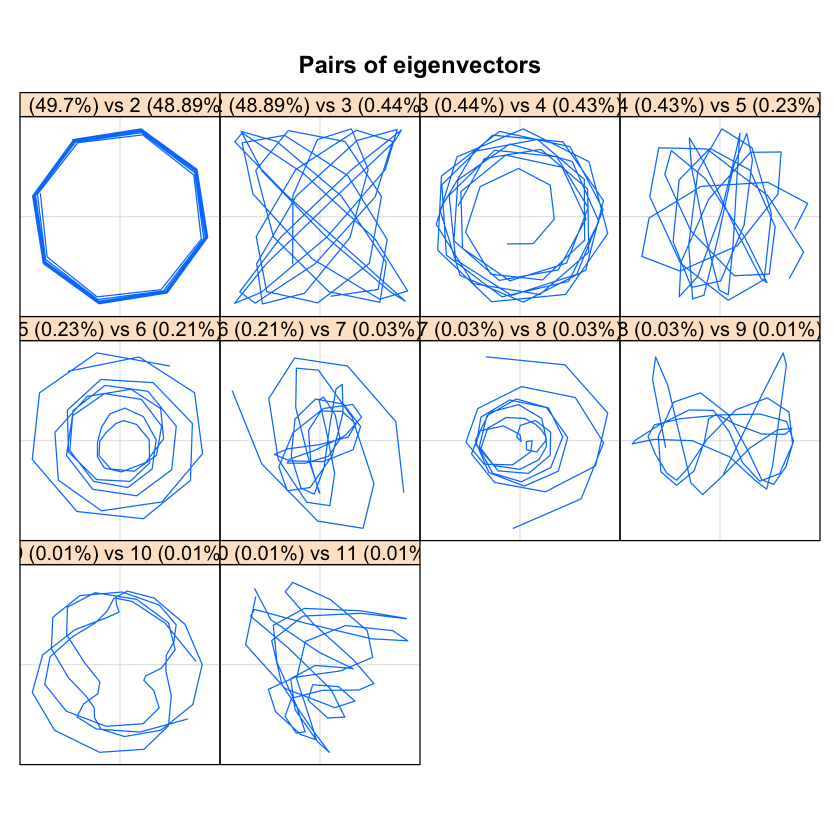

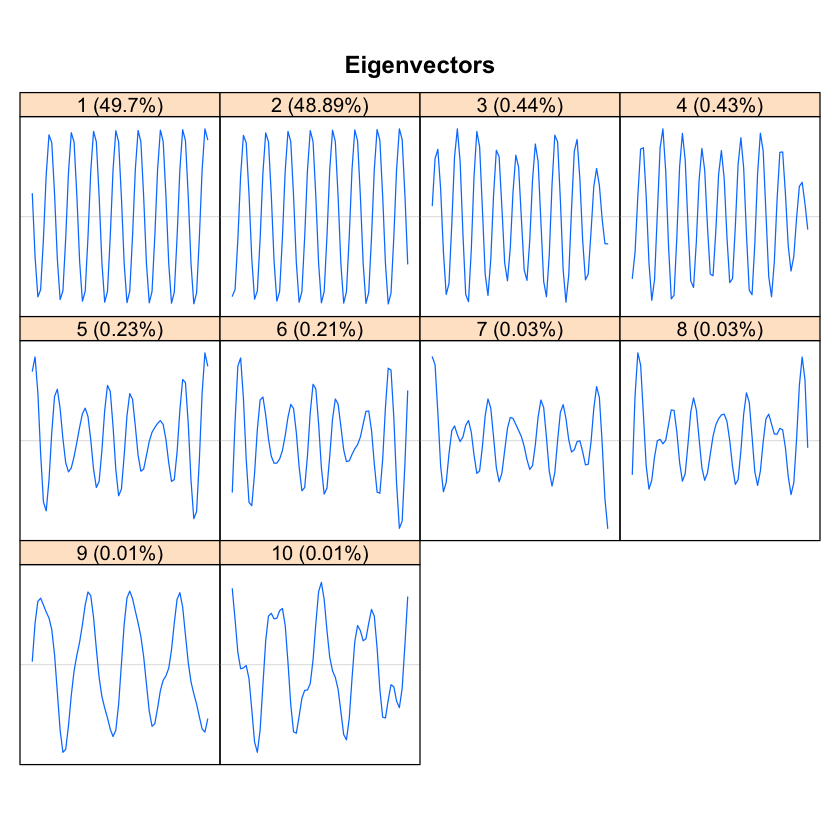

In [167]:
s_2 <- ssa(r_5$s_3, L = 64)
plot(s_2, type = "paired", idx=1:10)
# plot(s_2, type = "paired", idx=11:20)
plot(s_2, type = "vector", idx=1:10)
# plot(s_2, type = "vector", idx=11:20)

In [ ]:
-12.011912  2.867265     521857.4 1.000266
4  -8.020287  3.088795      58366.2 1.002269

In [15]:
10/11

[1] 0.9090909

In [ ]:
1 2
3 4
6 7
8 9 ?
10 11
20 21

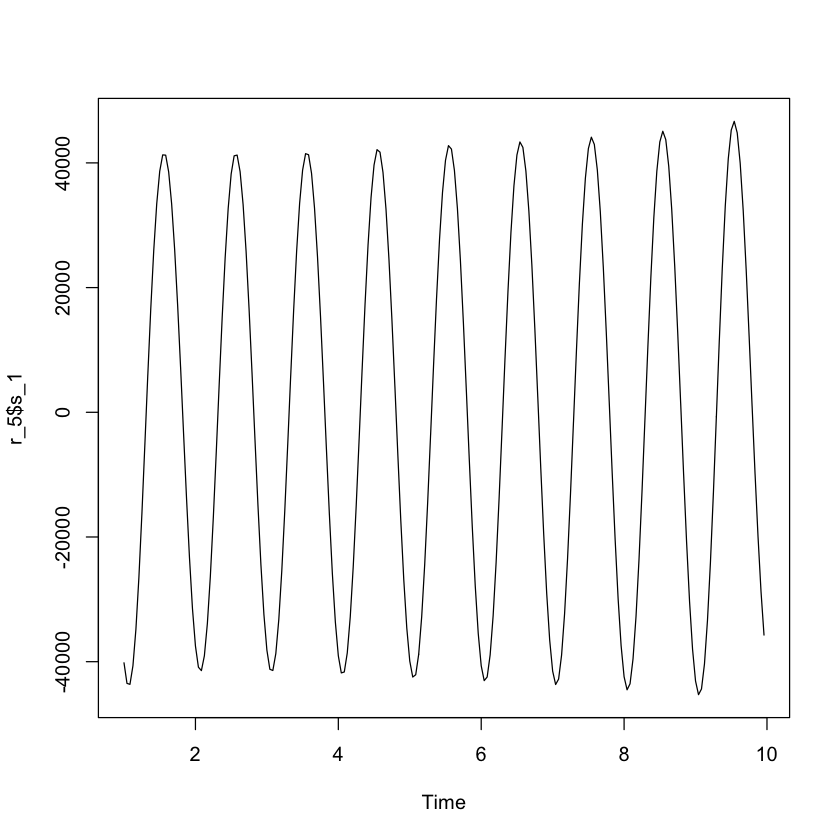

In [62]:
plot(r_5$s_1)

In [ ]:
plot(r_5$s_1)

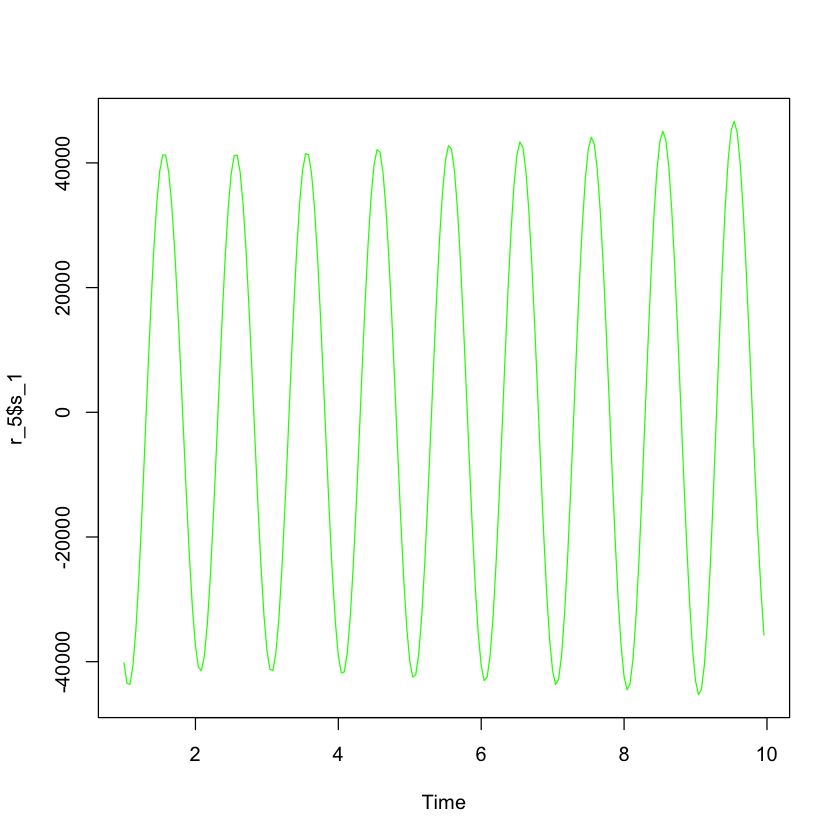

In [91]:
plot(r_5$s_1, col = 'green')

[1] 216

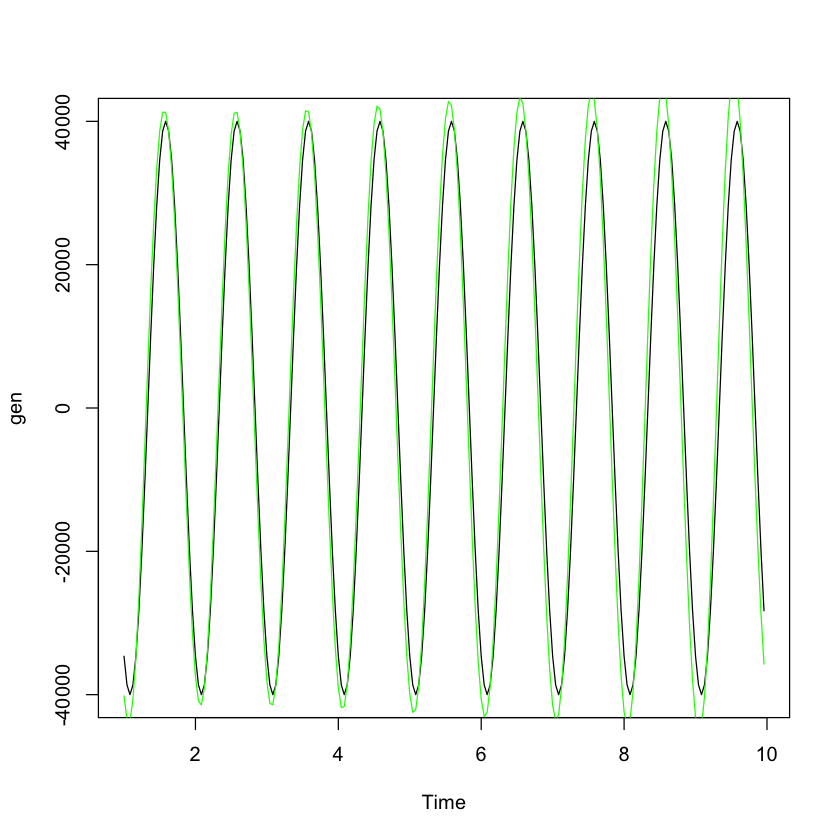

In [157]:
x <- seq(1, 216, by = 1)
length(x)
gen <- ts(40000*cos((2*pi*x)/24 + (3*pi)/4),frequency = 24)
plot(gen, type='l')
lines(r_5$s_1, col = 'green')

[1] 216

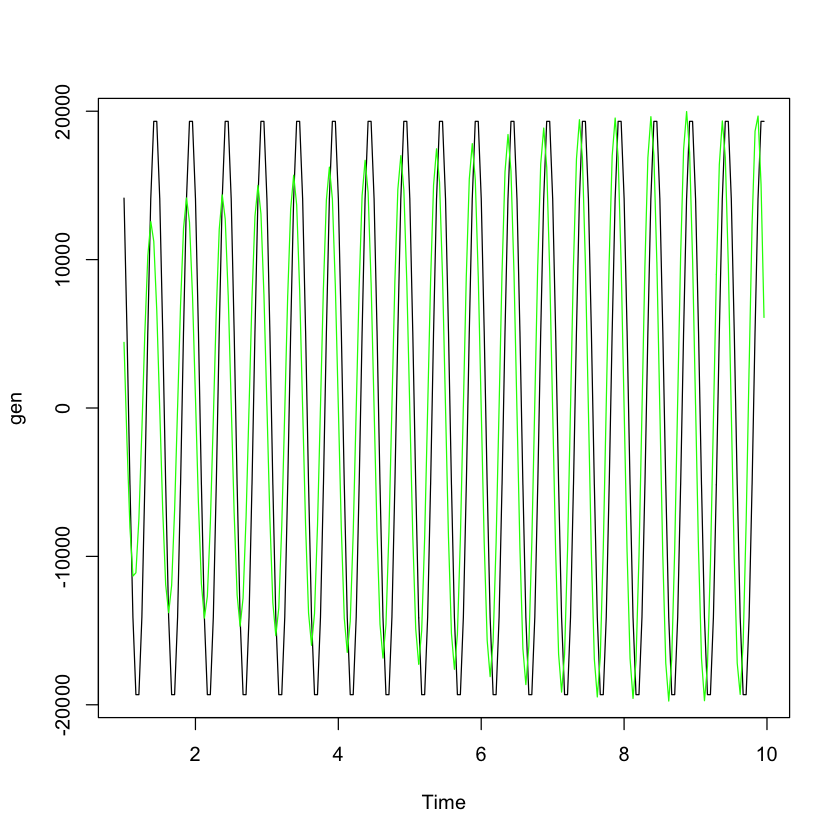

In [187]:
x <- seq(1, 216, by = 1)
length(x)
gen <- ts(20000*cos((2*pi*x)/12 + pi/12),frequency = 24)
plot(gen, type='l')
lines(r_5$s_2, col = 'green')

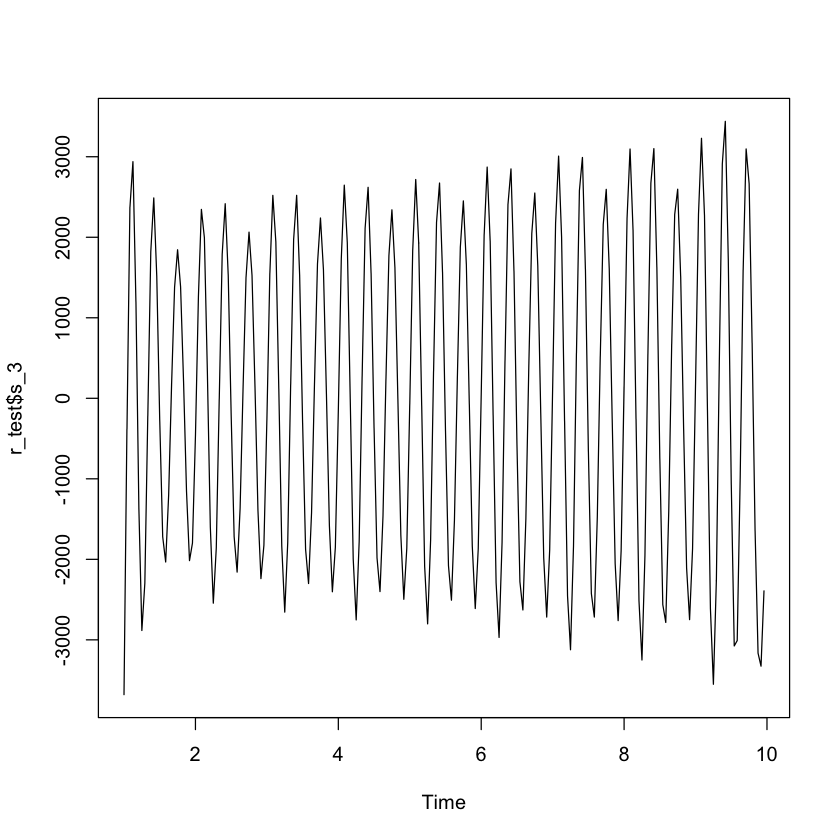

In [11]:
r_test <- reconstruct(s, groups = list(s_3 = c(6)))
plot(r_test$s_3)

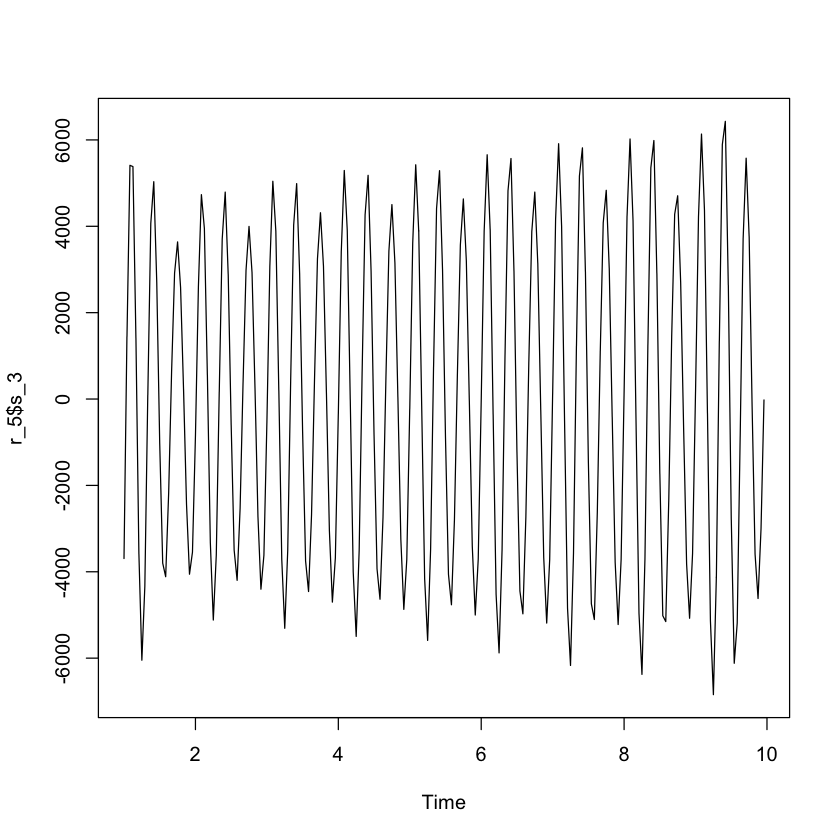

In [194]:
plot(r_5$s_3)

[1] 216

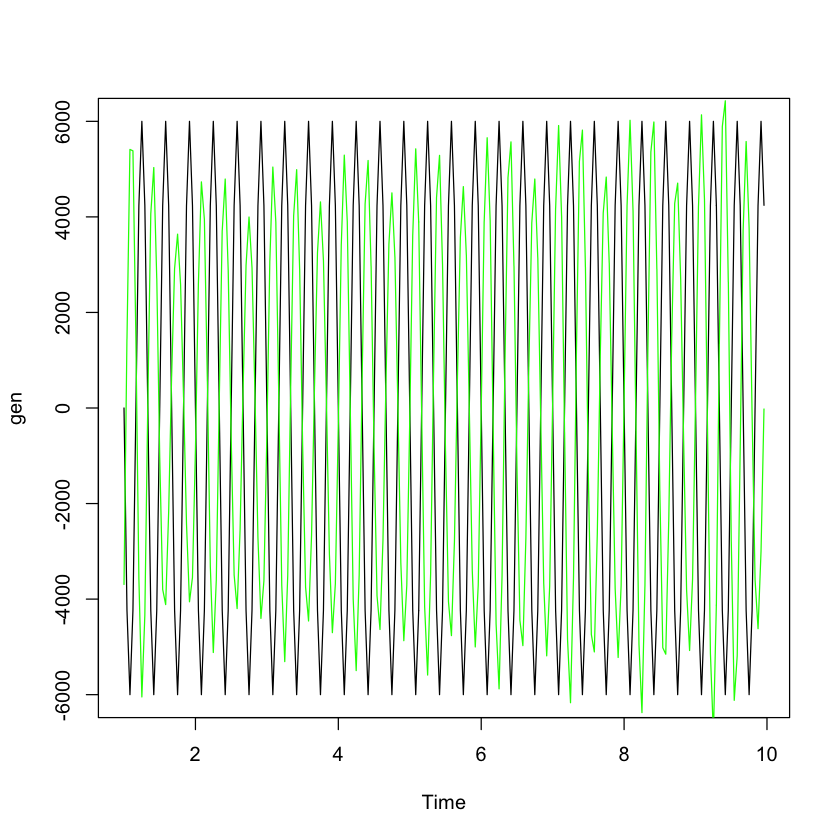

In [195]:
x <- seq(1, 216, by = 1)
length(x)
gen <- ts(6000*cos(((2*pi)/8)*x + pi/8),frequency = 24)
plot(gen, type='l')
lines(r_5$s_3, col = 'green')

In [ ]:
x <- seq(1, 216, by = 1)
length(x)
gen <- ts(40000*cos((2*pi*x)/24 + (3*pi)/4),frequency = 24)
plot(gen, type='l')
lines(r_5$s_1, col = 'green')

In [110]:
cos(pi/2)

[1] 6.123234e-17

In [134]:
x

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216

In [143]:
sin(pi)

[1] 1.224647e-16

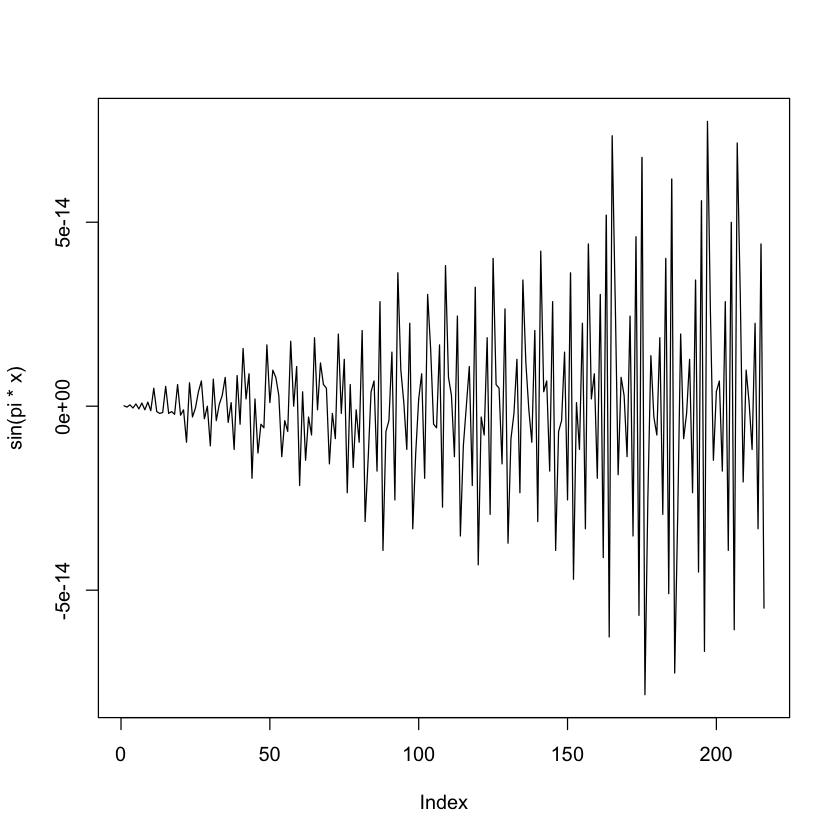

In [133]:
plot(sin(pi*x), type='l')

[1] -1.83697e-16

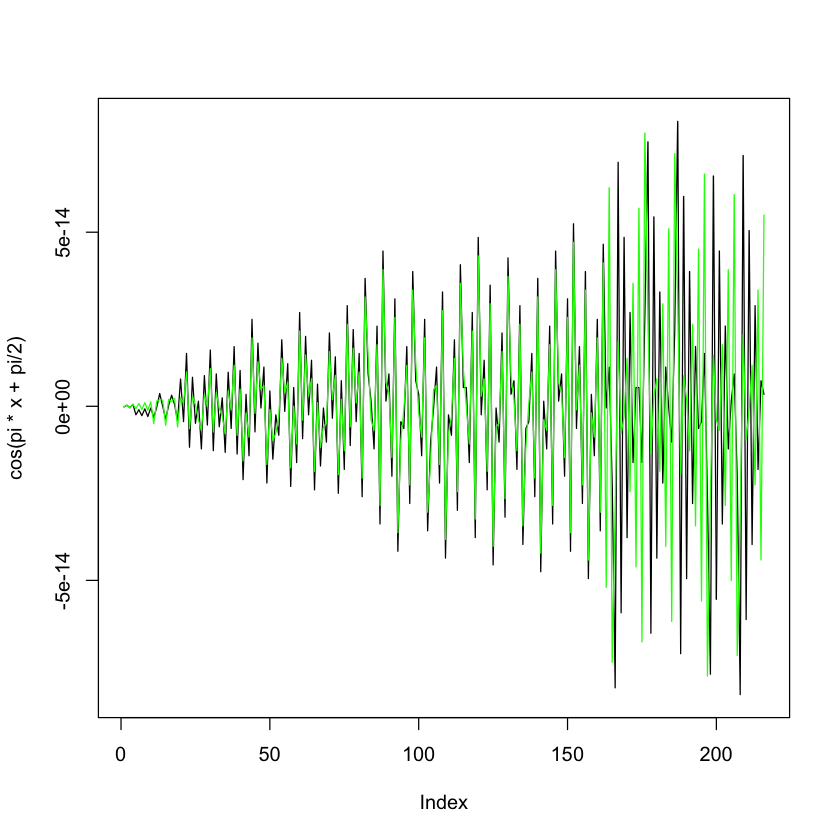

In [124]:
x <- seq(1, 216, by = 1)

plot(cos(pi*x + pi/2), type='l')
lines(-sin(pi*x)*sin(pi/2)+cos(pi*x)*cos(pi/2), col='green')

cos(pi + pi/2)

In [63]:
x <- seq(-3, 7, by = 1/8)
tx <- cbind(x, cos(pi*x), cospi(x), sin(pi*x), sinpi(x),
               tan(pi*x), tanpi(x), deparse.level=2)
op <- options(digits = 4, width = 90) # for nice formatting
head(tx)
tx[ (x %% 1) %in% c(0, 0.5) ,]
options(op)

Warning message in tanpi(x):
“созданы NaN”

x      cos(pi * x... cospi(x) sin(pi * x... sinpi(x) tan(pi * x... tanpi(x)
[1,] -3.000 -1.000e+00    -1.0000  -3.674e-16     0.0000   3.674e-16     0.0000 
[2,] -2.875 -9.239e-01    -0.9239  -3.827e-01    -0.3827   4.142e-01     0.4142 
[3,] -2.750 -7.071e-01    -0.7071  -7.071e-01    -0.7071   1.000e+00     1.0000 
[4,] -2.625 -3.827e-01    -0.3827  -9.239e-01    -0.9239   2.414e+00     2.4142 
[5,] -2.500  3.062e-16     0.0000  -1.000e+00    -1.0000  -3.266e+15        NaN 
[6,] -2.375  3.827e-01     0.3827  -9.239e-01    -0.9239  -2.414e+00    -2.4142

x    cos(pi * x... cospi(x) sin(pi * x... sinpi(x) tan(pi * x... tanpi(x)
 [1,] -3.0 -1.000e+00    -1       -3.674e-16     0        3.674e-16      0     
 [2,] -2.5  3.062e-16     0       -1.000e+00    -1       -3.266e+15    NaN     
 [3,] -2.0  1.000e+00     1        2.449e-16     0        2.449e-16      0     
 [4,] -1.5 -1.837e-16     0        1.000e+00     1       -5.444e+15    NaN     
 [5,] -1.0 -1.000e+00    -1       -1.225e-16     0        1.225e-16      0     
 [6,] -0.5  6.123e-17     0       -1.000e+00    -1       -1.633e+16    NaN     
 [7,]  0.0  1.000e+00     1        0.000e+00     0        0.000e+00      0     
 [8,]  0.5  6.123e-17     0        1.000e+00     1        1.633e+16    NaN     
 [9,]  1.0 -1.000e+00    -1        1.225e-16     0       -1.225e-16      0     
[10,]  1.5 -1.837e-16     0       -1.000e+00    -1        5.444e+15    NaN     
[11,]  2.0  1.000e+00     1       -2.449e-16     0       -2.449e-16      0     
[12,]  2.5  3.062e-16     0        1.000e+00     1        3.266e+15    NaN     
[13,]  3.0 -1.000e+00    -1        3.674e-16     0       -3.674e-16      0     
[14,]  3.5 -4.286e-16     0       -1.000e+00    -1        2.333e+15    NaN     
[15,]  4.0  1.000e+00     1       -4.899e-16     0       -4.899e-16      0     
[16,]  4.5  5.511e-16     0        1.000e+00     1        1.815e+15    NaN     
[17,]  5.0 -1.000e+00    -1        6.123e-16     0       -6.123e-16      0     
[18,]  5.5 -2.450e-15     0       -1.000e+00    -1        4.082e+14    NaN     
[19,]  6.0  1.000e+00     1       -7.348e-16     0       -7.348e-16      0     
[20,]  6.5 -9.803e-16     0        1.000e+00     1       -1.020e+15    NaN     
[21,]  7.0 -1.000e+00    -1        8.573e-16     0       -8.573e-16      0